In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
import transformers

In [20]:
df = pd.read_csv("../resources/dataset/UpdatedResumeDataSet.csv")

In [21]:
df.shape

(962, 2)

In [22]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [23]:
df.Resume[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [24]:
categories = list(df.Category.unique())
categories
print(len(categories))

25


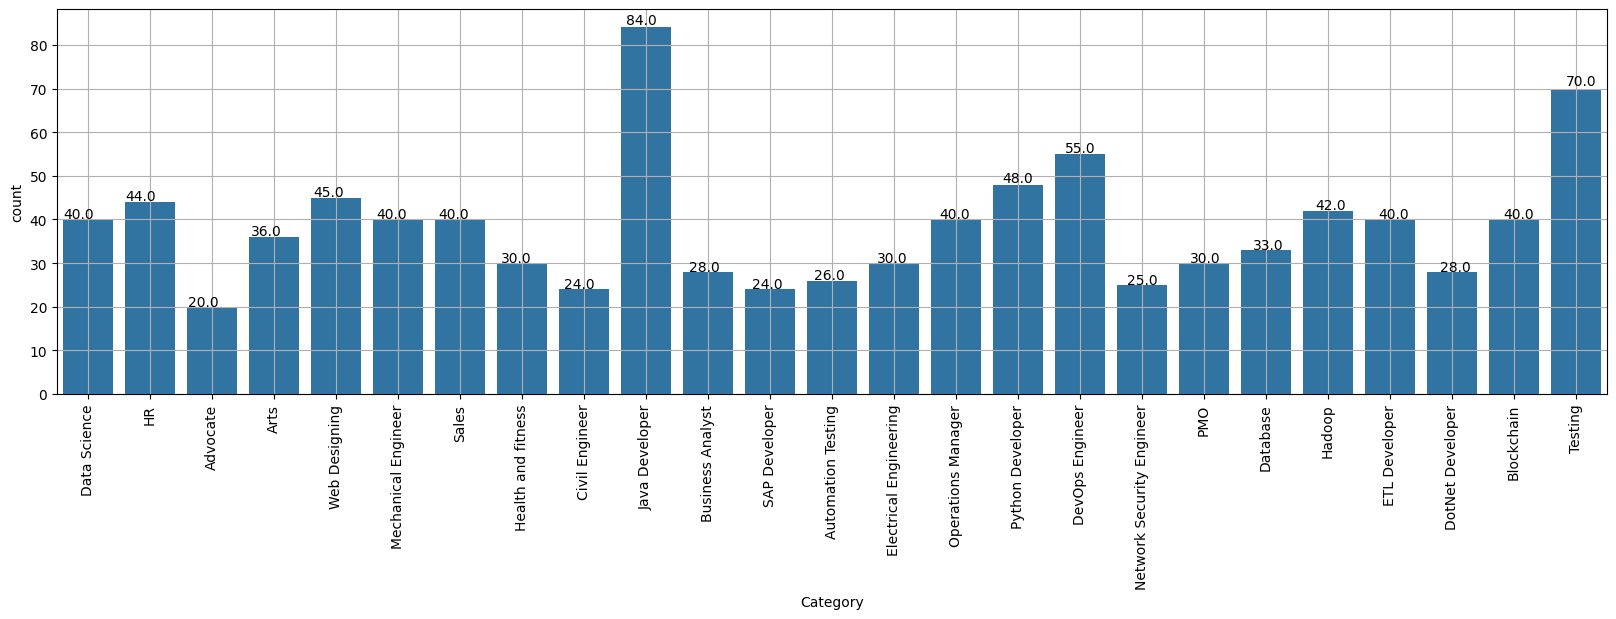

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.countplot(x="Category", data=df)
for p in ax.patches: 
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

In [26]:
df.duplicated(subset=["Resume"]).value_counts()

True     796
False    166
Name: count, dtype: int64

In [30]:
import re
import string

def clean_text(text):
    text = re.sub(r'http\S+', ' ',text)
    text = re.sub(r'@\S+', ' ',text)
    text = re.sub(r'RT|cc', ' ',text)
    text = re.sub(r'#\S+', ' ',text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    return text

df['Resume'] = df['Resume'].apply(lambda x: clean_text(x))

In [33]:
df['Resume'][1]

'education details may to may b e uit rgpv data scientist data scientist matelabs skill details python exprience less than year months statsmodels exprience months aws exprience less than year months machine learning exprience less than year months sklearn exprience less than year months scipy exprience less than year months keras exprience less than year monthscompany details company matelabs description ml platform for business professionals dummies and enthusiasts a koramangala th block achievements tasks behind sukh sagar bengaluru india developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction deployed automated classification and regression model linkedin com in aditya rathore b b reasearch and deployed the time series forecasting model arima sarimax holt winter and prophet worked on meta feature extracting problem github com rathorology implemented a state o

In [32]:
tf.__version__

'2.19.0'